Load the file spikes-LFP-2.mat available at the GitHub repository into Python. You will find three variables. The variable y corresponds to the LFP data, in units of millivolts. The variable n corresponds to simultaneously recorded binary spiking events. The variable t corresponds to the time axis, in units of seconds. Both y and n are matrices, in which each row indicates a separate trial, and each column indicates a point in time. Use these data to answer the following questions.

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = sio.loadmat('spikes-LFP-2.mat')       # Load the multiscale data,
y = data['y']                                # ... get the LFP data,
n = data['n']                                # ... get the spike data,
t = data['t'].reshape(-1)                    # ... get the time axis,
K = np.shape(n)[0]                           # Get the number of trials,
N = np.shape(n)[1]                           # ... and the number of data points in each trial,
dt = t[1]-t[0]                               # Get the sampling interval.

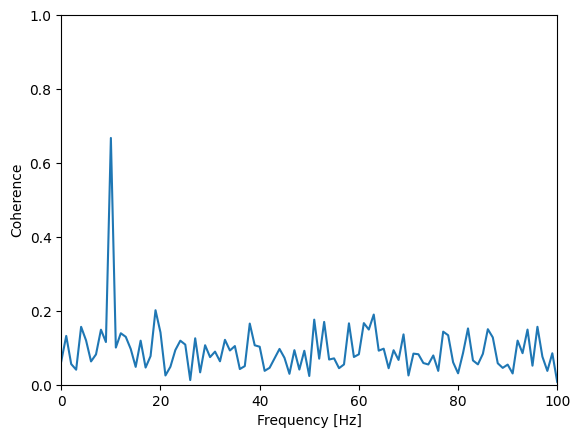

In [7]:
SYY = np.zeros(int(N/2+1))                                       # Variable to store field spectrum.
SNN = np.zeros(int(N/2+1))                                       # Variable to store spike spectrum.
SYN = np.zeros(int(N/2+1), dtype=complex)                        # Variable to store cross spectrum.

for k in np.arange(K):                                           # For each trial,
    yf = np.fft.rfft((y[k,:]-np.mean(y[k,:])) *np.hanning(N))    # Hanning taper the field,
    nf = np.fft.rfft((n[k,:]-np.mean(n[k,:])))                   # ... but do not taper the spikes.
    SYY = SYY + ( np.real( yf*np.conj(yf) ) )/K                  # Field spectrum
    SNN = SNN + ( np.real( nf*np.conj(nf) ) )/K                  # Spike spectrum
    SYN = SYN + (          yf*np.conj(nf)   )/K                  # Cross spectrum

cohr = np.abs(SYN) / np.sqrt(SYY) / np.sqrt(SNN)                 # Spike-field coherence
f = np.fft.rfftfreq(N, dt)                                       # Frequency axis for plotting

plt.plot(f,cohr)                             # Plot the result.
plt.xlim([0, 100])
plt.ylim([0, 1])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Coherence');

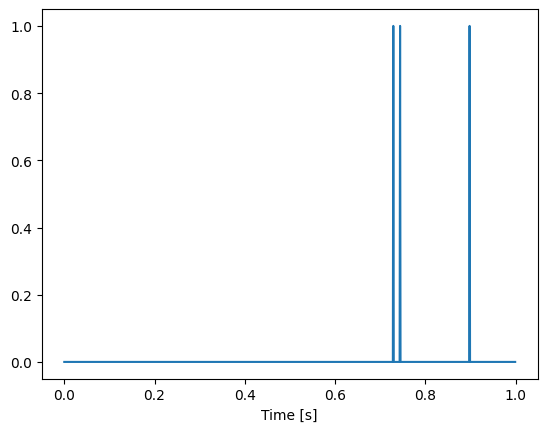

In [3]:
tm = np.arange(0,N)*dt
lambda0 = 5                         # Average firing rate [Hz]
p0      = lambda0*dt;               # Probability of a spike in a time bin
dn      = np.random.binomial(1,p0,N)# Create the spike train as "coin flips"

plt.plot(tm, dn)                    # Plot it.
plt.xlabel('Time [s]');